# Predicting the vaieties of wines with KNN

The aim of this project is to understand KNN by creating a Machine Learning model that is able to predict the varieties of wines.

In [1]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gather Data

In [2]:
df = pd.read_csv("Wine.csv")

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df.columns = ['class', 'alchol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
          'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
          'color_intensity','hue', 'OD280/OD315_diluted_wines','proline']

In [5]:
df.head(10)

,class,alchol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [6]:
print(df.shape)
print(df.dtypes)

(177, 14)
class                          int64
alchol                       float64
malic_acid                   float64
ash                          float64
alcalinity_of_ash            float64
magnesium                      int64
total_phenols                float64
flavanoids                   float64
nonflavanoid_phenols         float64
proanthocyanins              float64
color_intensity              float64
hue                          float64
OD280/OD315_diluted_wines    float64
proline                        int64
dtype: object


## Exploratory Data Analysis

In [7]:
input_data = df.iloc[:,1:]
input_data.describe().T

,count,mean,std,min,25%,50%,75%,max
alchol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
malic_acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
ash,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
alcalinity_of_ash,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
magnesium,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
total_phenols,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
flavanoids,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
nonflavanoid_phenols,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
proanthocyanins,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58
color_intensity,177.0,5.054802,2.324446,1.28,3.21,4.68,6.20,13.00


In [8]:
corr_df = input_data.corr(method='pearson')
corr_df

,alchol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_diluted_wines,proline
alchol,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
malic_acid,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
ash,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
alcalinity_of_ash,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
magnesium,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
total_phenols,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
flavanoids,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
nonflavanoid_phenols,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
proanthocyanins,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731
color_intensity,0.547883,0.250053,0.258643,0.020478,0.199337,-0.056401,-0.174411,0.140192,-0.027112,1.000000,-0.522615,-0.435744,0.315632


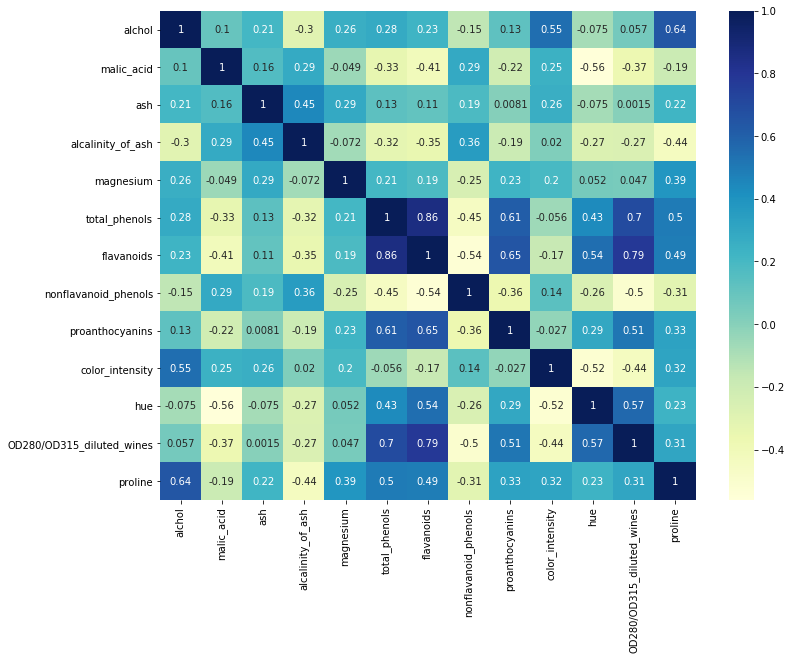

In [9]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_df, annot=True, cmap="YlGnBu")

In [10]:
# sum of the correlations for each element as absolute values
corr_abs_sum = corr_df.abs().sum()

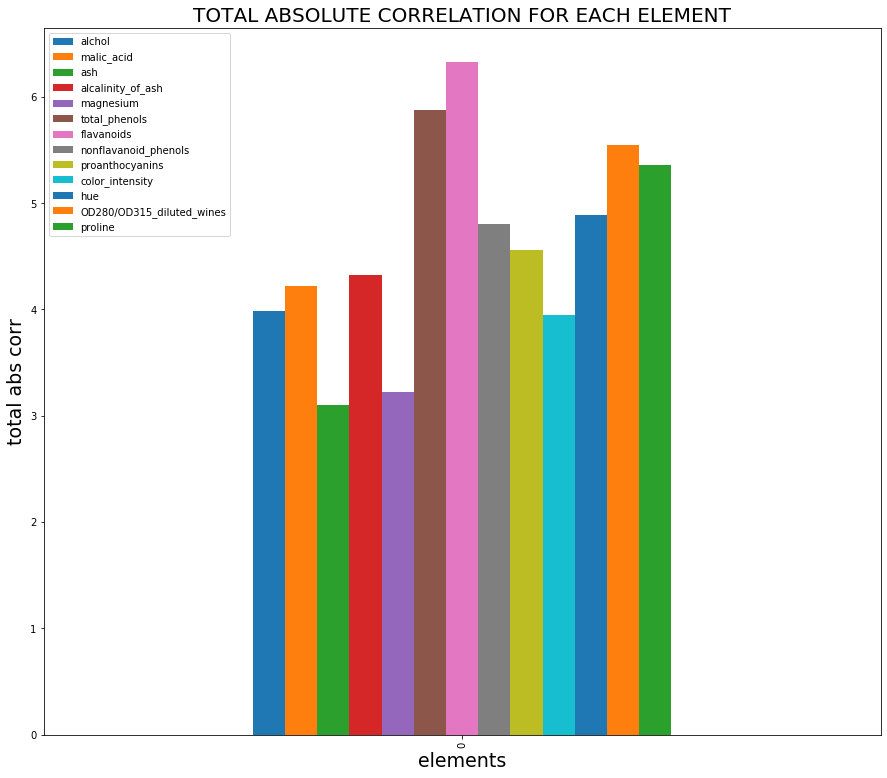

In [11]:
total_abs_corr = pd.DataFrame(corr_abs_sum).T

total_abs_corr.plot.bar(figsize=(15,13)) #(kind='bar', width=0.65, rot=0)
plt.title("TOTAL ABSOLUTE CORRELATION FOR EACH ELEMENT", fontsize=20)
plt.xlabel('elements', fontsize = 19)
plt.ylabel('total abs corr', fontsize = 19)
plt.legend(loc="upper left")

## Prepare the model 

In [135]:
# split data to train and test

y = df['class']
X = input_data.drop(columns=['ash','magnesium', 'color_intensity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [136]:
# to be sure that the data was split rightly (80% for train data and 20% for test data)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (141, 10)
y_train shape: (141,)


In [137]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (36, 10)
y_test shape: (36,)


In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
cli = KNeighborsClassifier(n_neighbors=1)
cli.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Evaluate the model

In [149]:
y_pred = cli.predict(X_test)
print("Test set score: {:.2f}".format(cli.score(X_test, y_test))) 

Test set score: 0.89


In [146]:
# below the values of the model 
from sklearn.metrics import classification_report
print("Final result of the model \n {}".format(classification_report(y_test, y_pred)))

Final result of the model 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.87      0.87      0.87        15
           3       0.71      0.71      0.71         7

    accuracy                           0.89        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.89      0.89      0.89        36

